# 3 一般化線形モデル(GLM) -ポアソン回帰-

In [1]:
using CSV
using DataFrames
using GLM
# using LaTeXStrings
using Plots
using StatsBase
using StatsPlots

ArgumentError: ArgumentError: Package GLM not found in current path:
- Run `import Pkg; Pkg.add("GLM")` to install the GLM package.


In [1]:
import Pkg
Pkg.add("GLM")

  Updating registry at `~/.julia/registries/General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`
Fetching: [========================================>]  100.0 %.0 %>                       ]  42.2 %============================>            ]  68.9 %]  95.4 % Resolving package versions...


Pkg.Types.ResolverError: Unsatisfiable requirements detected for package Distributions [31c24e10]:
 Distributions [31c24e10] log:
 ├─possible versions are: [0.1.0-0.1.4, 0.2.0-0.2.13, 0.3.0, 0.6.4-0.6.7, 0.7.0-0.7.6, 0.8.0-0.8.10, 0.9.0, 0.10.0-0.10.2, 0.11.0-0.11.1, 0.12.0-0.12.5, 0.13.0, 0.14.0-0.14.2, 0.15.0, 0.16.0-0.16.4, 0.17.0, 0.18.0, 0.19.1-0.19.2] or uninstalled
 ├─restricted to versions 0.19.2 by an explicit requirement, leaving only versions 0.19.2
 └─restricted by compatibility requirements with GLM [38e38edf] to versions: [0.16.0-0.16.4, 0.17.0, 0.18.0] — no versions left
   └─GLM [38e38edf] log:
     ├─possible versions are: [0.2.0-0.2.5, 0.3.0-0.3.2, 0.4.0-0.4.8, 0.5.0-0.5.6, 0.6.0-0.6.1, 0.7.0, 0.8.0-0.8.1, 0.9.0, 0.10.0-0.10.1, 0.11.0, 1.0.0-1.0.2, 1.1.0-1.1.1] or uninstalled
     ├─restricted to versions * by an explicit requirement, leaving only versions [0.2.0-0.2.5, 0.3.0-0.3.2, 0.4.0-0.4.8, 0.5.0-0.5.6, 0.6.0-0.6.1, 0.7.0, 0.8.0-0.8.1, 0.9.0, 0.10.0-0.10.1, 0.11.0, 1.0.0-1.0.2, 1.1.0-1.1.1]
     ├─restricted by compatibility requirements with StatsBase [2913bbd2] to versions: [0.11.0, 1.0.0-1.0.2, 1.1.0-1.1.1] or uninstalled, leaving only versions: [0.11.0, 1.0.0-1.0.2, 1.1.0-1.1.1]
     │ └─StatsBase [2913bbd2] log:
     │   ├─possible versions are: [0.1.0, 0.2.0-0.2.1, 0.2.3-0.2.10, 0.3.0-0.3.13, 0.4.0-0.4.4, 0.5.0-0.5.3, 0.6.0-0.6.16, 0.7.0-0.7.4, 0.8.0-0.8.3, 0.9.0, 0.10.0, 0.11.0-0.11.1, 0.12.0, 0.13.0-0.13.1, 0.14.0-0.14.1, 0.15.0, 0.16.0-0.16.1, 0.17.0, 0.18.0, 0.19.0-0.19.5, 0.20.0-0.20.1, 0.22.0, 0.23.0-0.23.1, 0.24.0, 0.25.0, 0.26.0, 0.27.0, 0.28.0-0.28.1, 0.29.0, 0.30.0] or uninstalled
     │   └─restricted to versions 0.30.0 by an explicit requirement, leaving only versions 0.30.0
     └─restricted by julia compatibility requirements to versions: [1.0.0-1.0.2, 1.1.0-1.1.1] or uninstalled, leaving only versions: [1.0.0-1.0.2, 1.1.0-1.1.1]

In [56]:
]update

  Updating registry at `~/.julia/registries/General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`
 Resolving package versions...
  Updating `~/.julia/environments/v1.1/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.1/Manifest.toml`
 [no changes]


In [58]:
]add https://github.com/JuliaPlots/StatsPlots.jl.git

   Cloning git-repo `https://github.com/JuliaPlots/StatsPlots.jl.git`
  Updating git-repo `https://github.com/JuliaPlots/StatsPlots.jl.git`                                ]  16.1 %18.6 %==============>                          ]  34.8 %50.7 %>         ]  76.0 % [=====================================>   ]  92.1 %
Fetching: [========================================>]  100.0 %.0 %>                    ]  47.5 %=================================>       ]  80.6 % Resolving package versions...


Pkg.Types.ResolverError: Unsatisfiable requirements detected for package Distributions [31c24e10]:
 Distributions [31c24e10] log:
 ├─possible versions are: [0.1.0-0.1.4, 0.2.0-0.2.13, 0.3.0, 0.6.4-0.6.7, 0.7.0-0.7.6, 0.8.0-0.8.10, 0.9.0, 0.10.0-0.10.2, 0.11.0-0.11.1, 0.12.0-0.12.5, 0.13.0, 0.14.0-0.14.2, 0.15.0, 0.16.0-0.16.4, 0.17.0, 0.18.0, 0.19.1-0.19.2] or uninstalled
 ├─restricted to versions 0.0.0-* by StatsPlots [f3b207a7], leaving only versions [0.1.0-0.1.4, 0.2.0-0.2.13, 0.3.0, 0.6.4-0.6.7, 0.7.0-0.7.6, 0.8.0-0.8.10, 0.9.0, 0.10.0-0.10.2, 0.11.0-0.11.1, 0.12.0-0.12.5, 0.13.0, 0.14.0-0.14.2, 0.15.0, 0.16.0-0.16.4, 0.17.0, 0.18.0, 0.19.1-0.19.2]
 │ └─StatsPlots [f3b207a7] log:
 │   ├─possible versions are: 0.10.2 or uninstalled
 │   └─StatsPlots [f3b207a7] is fixed to version 0.10.2+
 ├─restricted to versions 0.19.2 by an explicit requirement, leaving only versions 0.19.2
 └─restricted by compatibility requirements with KernelDensity [5ab0869b] to versions: [0.1.0-0.1.4, 0.2.0-0.2.13, 0.3.0, 0.6.4-0.6.7, 0.7.0-0.7.6, 0.8.0-0.8.10, 0.9.0, 0.10.0-0.10.2, 0.11.0-0.11.1, 0.12.0-0.12.5, 0.13.0, 0.14.0-0.14.2, 0.15.0, 0.16.0-0.16.4, 0.17.0, 0.18.0] — no versions left
   └─KernelDensity [5ab0869b] log:
     ├─possible versions are: [0.0.1-0.0.2, 0.1.0-0.1.2, 0.2.0, 0.3.0-0.3.2, 0.4.0-0.4.1, 0.5.0-0.5.1] or uninstalled
     └─restricted to versions 0.0.0-* by StatsPlots [f3b207a7], leaving only versions [0.0.1-0.0.2, 0.1.0-0.1.2, 0.2.0, 0.3.0-0.3.2, 0.4.0-0.4.1, 0.5.0-0.5.1]
       └─StatsPlots [f3b207a7] log: see above

## 3.2 観測されたデータの概要を調べる

In [17]:
df = CSV.read("data/section3.csv")

,y,x,f
,Int64⍰,Float64⍰,String⍰
1,6,8.31,C
2,6,9.44,C
3,6,9.5,C
4,12,9.07,C
5,10,10.16,C
6,4,8.32,C
7,9,10.61,C
8,9,10.06,C
9,9,9.93,C


### 列ごとにデータを表示

In [18]:
df.x

100-element Array{Union{Missing, Float64},1}:
  8.31
  9.44
  9.5 
  9.07
 10.16
  8.32
 10.61
 10.06
  9.93
 10.43
 10.36
 10.15
 10.92
  ⋮   
 10.73
  8.85
 11.2 
  9.86
 11.54
 10.03
 11.88
  9.15
  8.52
 10.24
 10.86
  9.97

In [19]:
df.y

100-element Array{Union{Missing, Int64},1}:
  6
  6
  6
 12
 10
  4
  9
  9
  9
 11
  6
 10
  6
  ⋮
  4
  5
  6
  5
  8
  5
  9
  8
  6
  8
  7
  9

In [20]:
df.f

100-element Array{Union{Missing, String},1}:
 "C"
 "C"
 "C"
 "C"
 "C"
 "C"
 "C"
 "C"
 "C"
 "C"
 "C"
 "C"
 "C"
 ⋮  
 "T"
 "T"
 "T"
 "T"
 "T"
 "T"
 "T"
 "T"
 "T"
 "T"
 "T"
 "T"

### データオブジェクトの型を調べる

In [21]:
typeof(df)

DataFrame

In [23]:
typeof(df.x)

Array{Union{Missing, Float64},1}

In [24]:
typeof(df.y)

Array{Union{Missing, Int64},1}

In [26]:
typeof(df.f)

Array{Union{Missing, String},1}

### データの要約

In [28]:
describe(df)

,variable,mean,min,median,max,nunique,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Union…,Int64,DataType
1,y,7.83,2,8.0,15,,0,Int64
2,x,10.0891,7.19,10.155,12.4,,0,Float64
3,f,,C,,T,2,0,String


### 3.3 統計モデリングの前にデータを図示する¶

#### データの図示

散布図

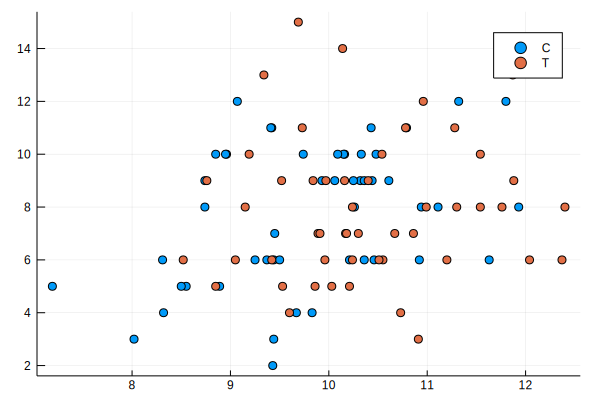

In [29]:
scatter(df.x, df.y, group=df.f)

箱ひげ図

In [30]:
boxplot(df.f, df.y, label="")

┌ Warning: seriestype boxplot has been moved to StatsPlots.  To use: `Pkg.add("StatsPlots"); using StatsPlots`
└ @ Plots /Users/hirokinishimoto/.julia/packages/Plots/47Tik/src/args.jl:1055
┌ Warning: seriestype boxplot has been moved to StatsPlots.  To use: `Pkg.add("StatsPlots"); using StatsPlots`
└ @ Plots /Users/hirokinishimoto/.julia/packages/Plots/47Tik/src/args.jl:1055


ErrorException: The backend must not support the series type Val{:boxplot}, and there isn't a series recipe defined.